## The code, data, and plots contained in this note belongs to speaktograph.

<img src="banner.png">

In [1]:
import numpy as np
from matplotlib import pyplot
import speech_recognition as sr
import time
from ipywidgets import Layout, widgets
import webbrowser as browse
import pyaudio
import struct
from pylab import *
from scipy import *
%matplotlib inline

## Transcribe

In [2]:
w1=widgets.ToggleButtons(options=['1','2','3','5','6'], description='Sesi:')
w2=widgets.ToggleButtons(options=['1','2','3','4'], description='Bagian:')
w3=widgets.ToggleButtons(options=['1', '2', '3'], description='Durasi menit:', value='2')
w4=widgets.ToggleButtons(options=['Jokowi', 'Prabowo', 'Panelis'], description='Calon:')
r = sr.Recognizer()
sesi=w1.value
bagian=w2.value
durasi=w3.value
oleh=w4.value
d=int(durasi)*60
display(w1,w2,w3,w4)

ToggleButtons(description='Sesi:', options=('1', '2', '3', '5', '6'), value='1')

ToggleButtons(description='Bagian:', options=('1', '2', '3', '4'), value='1')

ToggleButtons(description='Durasi menit:', index=1, options=('1', '2', '3'), value='2')

ToggleButtons(description='Calon:', options=('Jokowi', 'Prabowo', 'Panelis'), value='Jokowi')

In [53]:
r = sr.Recognizer()
sesi=w1.value
bagian=w2.value
oleh=w4.value
durasi=w3.value
d=int(durasi)*58
with sr.Microphone() as source:
#     audio = r.listen(source)
    audio = r.record(source, duration=d)
    
text = r.recognize_google(audio, language="id-ID")
try:
    print(text)
except:
    pass

yang paling sulit adalah menjaga keseimbangan harga petaninya seneng masyarakat juga seneng kalo kita hanya ingin menaikkan harga Polda gabah Yadi naik aja HP kita tetapi harga di pasar akan juga ikut naik masyarakat akan merasakan beban di situ keseimbangan inilah yang terus kita jaga artinya apa petani juga bisa mendapatkan untung tetapi masyarakat juga bisa menjangkau harga yang ada di pasar sebetulnya kesulitannya ada di sinilah fungsi Pemerintah menjaga stabilitas harga menjaga stabilitas stop agar dua-duanya Ini mendapat keuntungan kita juga memiliki strategi besar rakyat gak tahu yaitu membangun Bendungan sebanyak-banyaknya karena kebutuhan air yang ada di negara kita ini untuk pengairan sawah itu baru terus supply 11% dengan terbangunnya 49 waduk yang telah kita kerjakan ini itu baru mencapai 20% dari kebutuhan yang ada strategi besarnya ada tetapi yang harian yang mingguannya juga harus kita selesaikan kita terus harus membangun Waduk ini agar di semua provinsi yang memiliki p

## Registering text

In [51]:
sesi=w1.value
bagian=w2.value
oleh=w4.value
globals()['ses'+str(sesi)+'bag'+str(bagian)+oleh]=text
with open('ses'+str(sesi)+'bag'+str(bagian)+oleh+'.txt', "w") as t:
    t.write(text)
print('text saved as: '+'ses'+str(sesi)+'bag'+str(bagian)+oleh+'.txt')
# browse.open('ses'+str(sesi)+'bag'+str(bagian)+oleh+'.txt')

text saved as: ses5bag1Jokowi.txt


## Content

In [42]:
text="Sahabatku di manapun kau berada, majelis yang terhormat, Saudara Insinyur Joko Widodo yang saya hormati, malam hari ini kita berkumpul untuk membahas masalah yang sangat penting dalam kehidupan bangsa yaitu infrastruktur, pangan, energi, sumber daya alam, dan lingkungan hidup. ini bisa dikatakan inti masalah daripada kehidupan berbangsa dan bernegara. Kami punya visi bahwa justru di bidang bidang inilah untuk menjadi negara berhasil kita harus sungguh-sungguh membangun suatu kemandirian. Kita harus berdiri di atas kaki kita sendiri. Kita harus swasembada pangan, swasembada energi, swasembada air, agar kita bisa survive sebagai suatu bangsa. PBB sekarang mengatakan bahwa inilah tiga masalah yang utama tolak ukur keberhasilan suatu negara. Suatu negara dikatakan bisa berhasil kalau bisa memenuhi pangan untuk rakyatnya, energi untuk rakyatnya, dan air tanpa impor. Kami kalau berkuasa nanti insya Allah dapat mandat dari rakyat, kami akan menjamin pangan tersedia dengan harga terjangkau untuk seluruh rakyat Indonesia dan kami akan menjamin bahwa produsen petani, peternak, petambak, nelayan harus mendapatkan imbalan penghasilan yang memadai, itu komitmen kami. Kami juga akan segera turunkan harga listrik, harga makanan-makanan pokok dan kami akan menyiapkan pupuk dalam keadaan dalam jumlah berapa yang dibutuhkan kami akan siapkan sampai ke petani. Ini komitmen kami kami yakin Indonesia bisa berdiri di atas kaki kita sendiri. Kita akan mengamankan semua sumber-sumber ekonomi bangsa Indonesia. Kita akan menjaga pundi-pundi bangsa Indonesia supaya kekayaan kita tidak mengalir ke luar negeri. Masalah pokok bangsa kita adalah bahwa kekayaan kita tidak tinggal di republik kita. Ini bukan salah siapapun, ini salah kita semua sebagai bangsa karena itu saya mengajak marilah kita bersama sama mencari pemecahan masalah. saya menghargai apa yang sudah dilakukan oleh Pak Joko Widodo dibidang infrastruktur beliau telah bekerja keras, namun namanya demokrasi saya menawarkan suatu strategi yang akan lebih cepat membawa kemakmuran dan keadilan bagi rakyat Indonesia"

In [5]:
totalword=len(text.split())
unique=len(set(text.split()))
uratio=round(unique/totalword*100, 1)
gap=round((int(durasi)*90-totalword)/2, 1)
print ('gap and pause: '+str(gap)+'%')
print ('spoken words: '+str(totalword))
print ('unique words: '+str(unique))
print ('unique word ratio: '+str(uratio)+'%')

gap and pause: -59.5%
spoken words: 299
unique words: 176
unique word ratio: 58.9%


## Frequent words

In [56]:
khubung = loadtxt("konjungsi.txt", dtype=str)
for i in range (len(khubung)):
    text=text.replace(str(khubung[i]), '')
wordcount={}
for word in text.split():
    if word not in wordcount:
        wordcount[word] = 1
    else:
        wordcount[word] += 1
jumlah=[]; kata=[]
for k,j in wordcount.items():
    jumlah.append(j)
    kata.append(k)
print(kata); print(jumlah)

['Sahabatku', 'di', 'manapun', 'kau', 'berada,', 'majelis', 'terhormat,', 'Saudara', 'Insinyur', 'Joko', 'Widodo', 'sa', 'hormati,', 'malam', 'hari', 'kita', 'berkumpul', 'membahas', 'masalah', 'sangat', 'penting', 'hidupan', 'bangsa', 'infrastruktur,', 'pangan,', 'energi,', 'sumber', 'da', 'alam,', 'lingkungan', 'hidup.', 'bisa', 'dikat', 'inti', 'pada', 'berbangsa', 'bernegara.', 'Kami', 'pun', 'visi', 'bahwa', 'justru', 'big', 'lah', 'menjadi', 'negara', 'berhasil', 'harus', 'sungguh-sungguh', 'membangun', 'suatu', 'mandirian.', 'Kita', 'berdiri', 'atas', 'kaki', 'sendiri.', 'swasembada', 'air,', 'agar', 'survive', 'sebagai', 'bangsa.', 'PBB', 'sekarang', 'mengat', 'tiga', 'utama', 'tolak', 'ukur', 'berhasilan', 'negara.', 'Suatu', 'kalau', 'memenuhi', 'pangan', 'raktn,', 'energi', 'air', 'tanpa', 'impor.', 'berkuasa', 'nanti', 'ins', 'Allah', 'dapat', 'mandat', 'rakt,', 'kami', 'menjamin', 'tersedia', 'harga', 'terjangkau', 'seluruh', 'rakt', 'Indonesia', 'produsen', 'petani,', 'pe

In [60]:
import csv
with open('ses4Jokowi.freq.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerows(zip(jumlah, kata))

([], <a list of 0 Text xticklabel objects>)

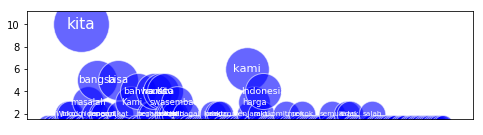

In [57]:
fig=plt.figure(figsize=(8, 2))
for i in range (len(kata)):
    if len(kata[i])>3:
        area=jumlah[i]*300+100
        scatter(i, jumlah[i], c='blue', s=area, edgecolor='w', alpha=0.6)
        plt.text(i, jumlah[i], kata[i], fontsize=5+area/300, color='white', \
             horizontalalignment='center', verticalalignment='center')
ylim(ymin=1.5, ymax=max(jumlah)+max(jumlah)/8)
# ylim(ymin=1.5, ymax=10)
xticks([])

3.2608695652173916

## Confidence

(0.0, 8.0, 0.5639613886716172, 1.5286222040681294)

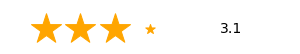

In [58]:
self=loadtxt("self1.txt", dtype=str)
# self=loadtxt("self2.txt", dtype=str)

pdcount=0
for i in range (len(self)):
    pdcount += text.count(self[i])
    
pdrate=round(2.5+(pdcount/totalword*10),1)
if pdrate>5:
    pdrate=5
star=arange(1,int(pdrate//1)+1)
pstar=pdrate-int(pdrate//1)

fig=plt.figure(figsize=(5, 0.6))
for i in range (len(star)):
    scatter(star[i], 1, marker='*', s=1000, c='orange')
if pstar !=0:
    scatter(max(star)+1, 1, marker='*', s=1000*pstar, c='orange')
plt.text(6, 1, pdrate, fontsize=14, verticalalignment='center')
xlim(xmin=0.0, xmax=8); xticks([]); yticks([]); axis('off')


## Optimism

(0.0, 8.0, 0.5639613886716172, 1.5286222040681294)

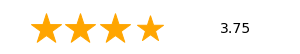

In [71]:
opt=loadtxt("positif_ta.txt", dtype=str)
pes1=loadtxt("negatif_ta.txt", dtype=str)
pes2=[]
for i in range (len(opt)):
    pes2.append('tidak '+str(opt[i]))

optcount=0; pes1count=0; pes2count=0
for i in range (len(opt)):
    optcount += text.count(opt[i])
    pes2count += text.count(pes2[i])
for i in range (len(pes1)):
    pes1count += text.count(pes1[i])
pescount=pes1count+pes2count

optrate=round((optcount-pescount*2.5)/2,2)
if optrate>5:
    optrate=5
if optrate<1:
    optrate=1
star=arange(1,int(optrate//1)+1)
pstar=optrate-int(optrate//1)
fig=plt.figure(figsize=(5, 0.6))
for i in range (len(star)):
    scatter(star[i], 1, marker='*', s=1000, c='orange')
if pstar !=0:
    scatter(max(star)+1, 1, marker='*', s=1000*pstar, c='orange')
plt.text(6, 1, optrate, fontsize=14, verticalalignment='center')
xlim(xmin=0.0, xmax=8); xticks([]); yticks([]); axis('off')

# print('opt:',optcount,' , pes:',pescount)

In [51]:
2.5+(20-10)/2

7.5

## Talkativeness

In [73]:
# tivrate=round(2.99+(90-gap)/50, 2)
# if tivrate>5:
#     tivrate=5
# star=arange(1,int(tivrate//1)+1)
# pstar=tivrate-int(tivrate//1)

# fig=plt.figure(figsize=(5, 0.6))
# for i in range (len(star)):
#     scatter(star[i], 1, marker='*', s=1000, c='orange')
# if pstar !=0:
#     scatter(max(star)+1, 1, marker='*',s=1000*pstar, c='orange')

# plt.text(6, 1, tivrate, fontsize=14, verticalalignment='center')
# xlim(xmin=0.0, xmax=8); xticks([]); yticks([]); axis('off')

tivrate=1.5
tiv=(100-tivrate)/20
print(tiv)

4.925


In [25]:
pstar

-1.8599999999999999

## Literary technique

In [46]:
# Based on Handbook of Literary Terms
anaphora=()
hyperbole=()
tripling=()
repetition=()
parellelism=()
statistical=()
# et cetera

In [40]:
kal='tidak mampu berantas korupsi'
split(kal)

TypeError: split() missing 1 required positional argument: 'indices_or_sections'